<a href="https://colab.research.google.com/github/Soudari0804/Credit-Card-Fraud-Detection/blob/main/fraud1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
from sklearn.ensemble import IsolationForest

from sklearn.svm import OneClassSVM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ** Import the dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/creditcard (1).csv",nrows=500)


In [ ]:
row = df.iloc[499]
print(row)

Time      368.000000
V1          1.239173
V2          0.103368
V3          0.371711
V4          0.440033
V5         -0.370396
V6         -0.509393
V7         -0.129165
V8          0.030558
V9         -0.010578
V10         0.138778
V11         0.985592
V12         0.311879
V13        -0.912072
V14         0.655089
V15         0.486979
V16         0.650936
V17        -0.724128
V18         0.207023
V19         0.301955
V20        -0.148074
V21        -0.240934
V22        -0.790563
V23         0.097823
V24        -0.034851
V25         0.190347
V26         0.101428
V27        -0.041183
V28         0.002979
Amount      1.980000
Class       0.000000
Name: 499, dtype: float64


# Display Top 5 Rows of the Dataset

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Display Bottom 5 Rows of the Dataset

In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.shape

(500, 31)

In [ ]:
print("Number of Rows", df.shape[0])
print("number of columns", df.shape[1])

Number of Rows 500
number of columns 31


# Get Information about our dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    500 non-null    int64  
 1   V1      500 non-null    float64
 2   V2      500 non-null    float64
 3   V3      500 non-null    float64
 4   V4      500 non-null    float64
 5   V5      500 non-null    float64
 6   V6      500 non-null    float64
 7   V7      500 non-null    float64
 8   V8      500 non-null    float64
 9   V9      500 non-null    float64
 10  V10     500 non-null    float64
 11  V11     500 non-null    float64
 12  V12     500 non-null    float64
 13  V13     500 non-null    float64
 14  V14     500 non-null    float64
 15  V15     500 non-null    float64
 16  V16     500 non-null    float64
 17  V17     500 non-null    float64
 18  V18     500 non-null    float64
 19  V19     500 non-null    float64
 20  V20     500 non-null    float64
 21  V21     500 non-null    float64
 22  V2

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# Normal and Fraud (undersampling)

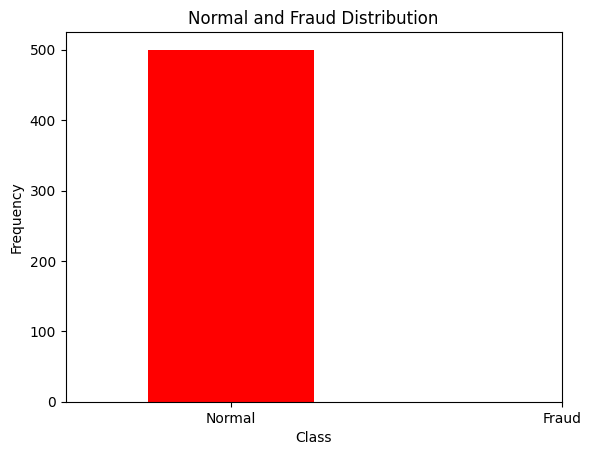

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/creditcard (1).csv",nrows=500)

# Get the distribution of the target variable 'Class'
fraud_check = df['Class'].value_counts(sort=True)

# Plot the distribution as a bar chart
fraud_check.plot(kind='bar', rot=0, color='r')
plt.title("Normal and Fraud Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

# Define labels for the x-axis
labels = ['Normal', 'Fraud']

# Map those labels to the x-axis ticks
plt.xticks(range(2), labels)
plt.show()


In [ ]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [ ]:
fraud_people.shape

(0, 31)

In [ ]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [ ]:
normal_people.shape

(500, 31)

In [ ]:
fraud_people['Amount'].describe()

,Amount
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
normal_people['Amount'].describe()

,Amount
count,500.000000
mean,69.719160
std,217.901038
min,0.000000
25%,6.000000
50%,18.155000
75%,60.295000
max,3828.040000


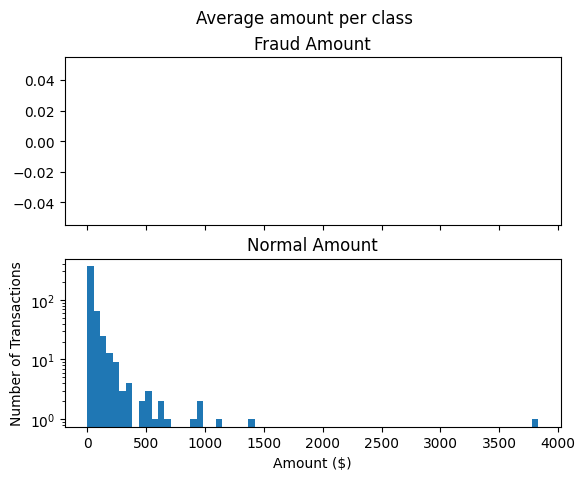

In [ ]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'] , bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

In [ ]:
df = pd.read_csv("creditcard (1).csv",nrows=500)
df = df.sample(frac = 0.1, random_state = 1)

print(df.shape)
print(df.describe())

(50, 31)
             Time         V1         V2         V3         V4         V5  \
count   50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
mean   187.720000  -0.339029   0.217031   0.851602   0.429810   0.063713   
std    102.313851   1.588433   1.510276   1.047345   1.121046   0.912557   
min      2.000000  -5.285971  -5.449369  -1.542143  -2.450936  -1.737687   
25%     95.750000  -0.991267  -0.168140   0.050054  -0.157621  -0.567619   
50%    215.000000  -0.356717   0.324642   0.844715   0.542654  -0.086204   
75%    254.750000   1.073292   0.916570   1.568600   1.029753   0.534786   
max    362.000000   1.478773   4.847323   2.988498   2.935466   2.697143   

              V6         V7         V8         V9  ...        V21        V22  \
count  50.000000  50.000000  50.000000  50.000000  ...  50.000000  50.000000   
mean    0.179019   0.083786   0.039731   0.082524  ...  -0.098978  -0.056041   
std     1.130984   0.654567   0.633263   0.937349  ...   0.392581 

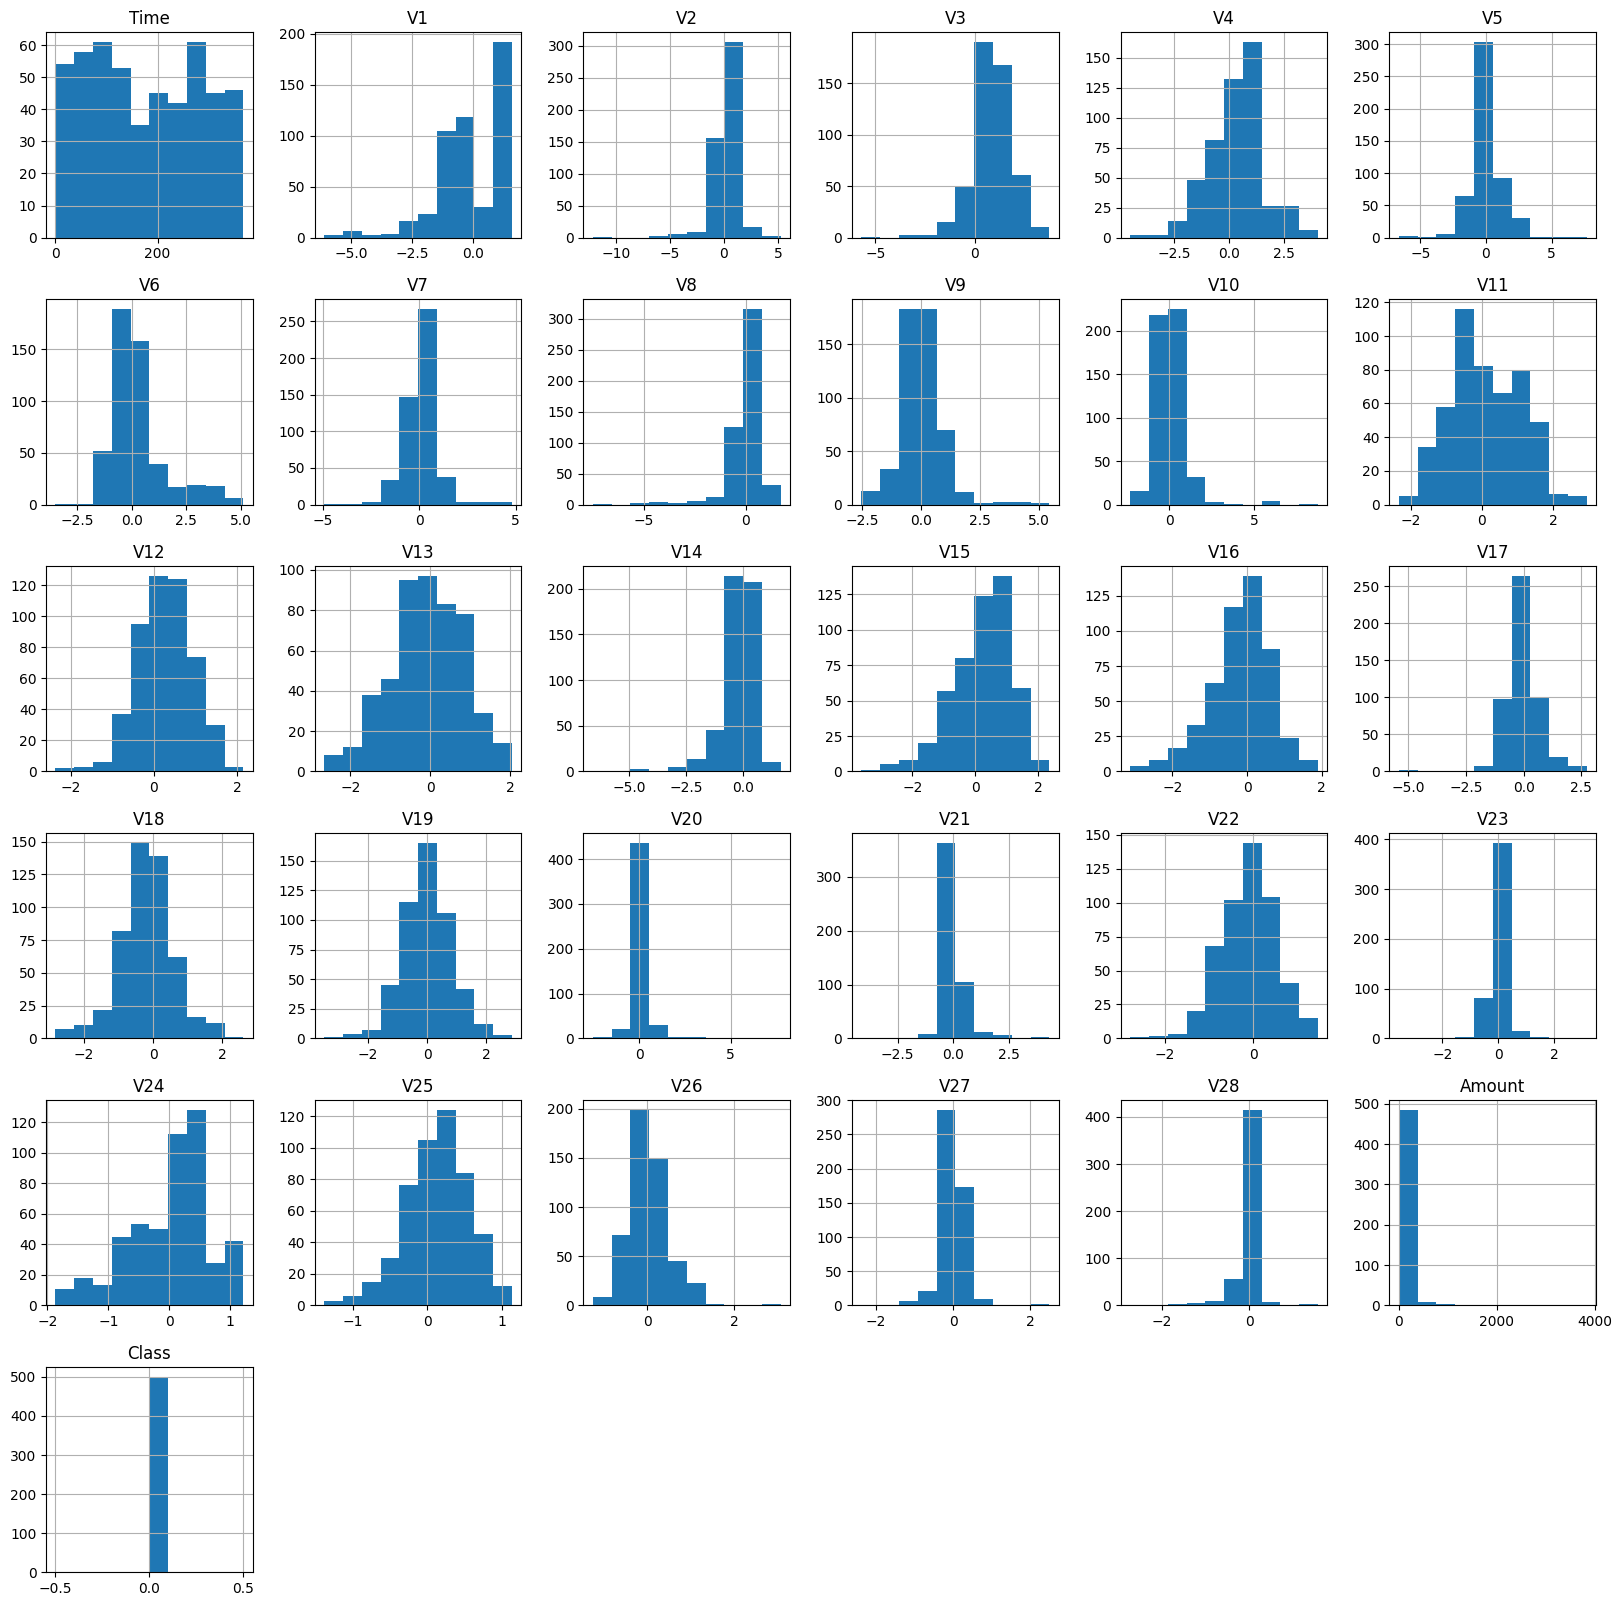

In [ ]:
#plot histogram of each parameter
df = pd.read_csv("creditcard (1).csv",nrows=500)
df.hist(figsize = (20,20))
plt.show()

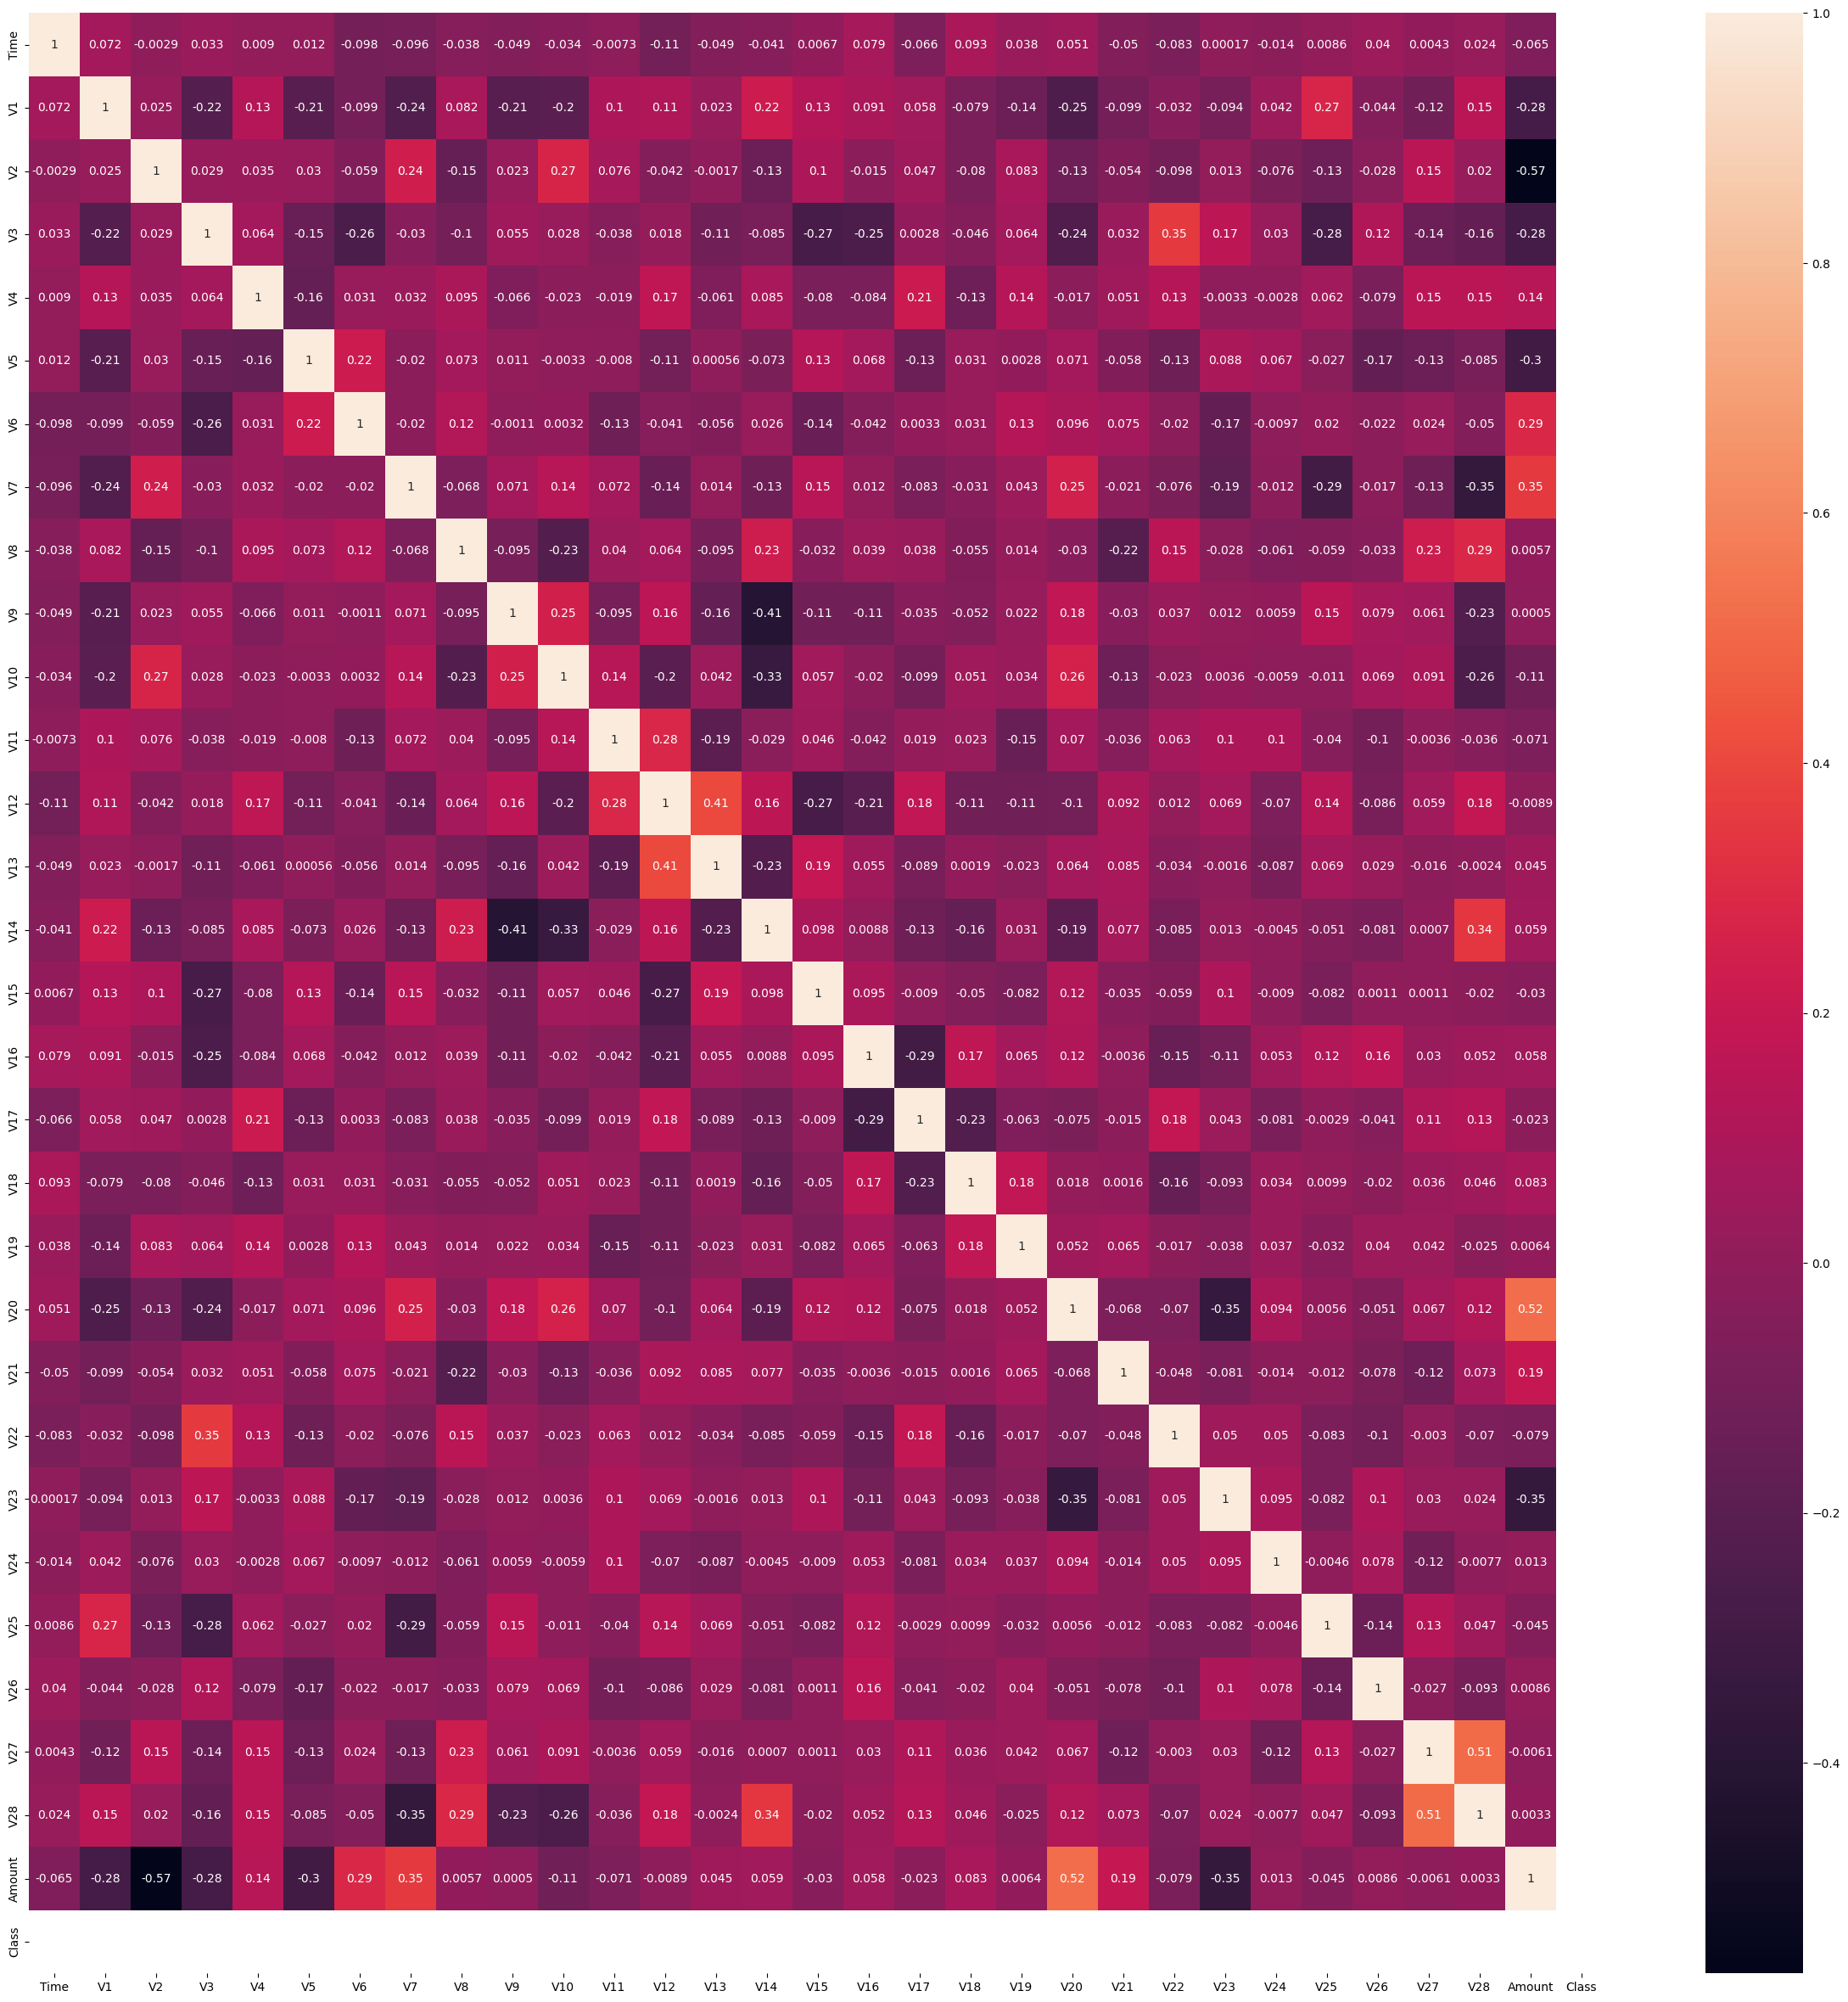

In [ ]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("creditcard (1).csv",nrows=500)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(30, 30))
g = sns.heatmap(df.corr(), annot=True)
plt.show()


In [ ]:
columns = df.columns.tolist()
# Making our Independent Features
columns = [var for var in columns if var not in ["Class"]]
# Making our Dependent Variable
target = "Class"
x= df[columns]
y= df[target]

In [ ]:
x.shape

(500, 30)

In [ ]:
y.shape

(500,)

In [ ]:
x.head() ## Independent Variable

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y.head() ## Dependent Variable

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
!pip install scikit-learn
from sklearn.ensemble import IsolationForest

# Initialize the IsolationForest model


In [ ]:
iso_forest = IsolationForest(n_estimators=100, max_samples=len(x_train), random_state=0, verbose=0)

In [ ]:
iso_forest.fit(x_train,y_train)

IsolationForest(max_samples=350, random_state=0)

In [ ]:
ypred= iso_forest.predict(x_test)

In [ ]:
ypred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_test and ypred are already defined
print(accuracy_score(y_test, ypred))


0.9266666666666666


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and ypred are already defined
print(classification_report(y_test, ypred))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96       150
           1       0.00      0.00      0.00         0

    accuracy                           0.93       150
   macro avg       0.50      0.46      0.48       150
weighted avg       1.00      0.93      0.96       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, ypred)

array([[139,  11],
       [  0,   0]])

In [ ]:
n_errors = (ypred != y_test).sum()
print("Isolation Forest have {} errors.".format(n_errors))

Isolation Forest have 11 errors.


In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np

# Example training data: normal data points
X_train = np.array([[1], [2], [3], [4], [5]])

# Create the OneClassSVM model with RBF kernel
svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)

In [ ]:
print(OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05).fit(np.array([[1], [2], [3], [4], [5]])).predict(np.array([[1.5], [2.5], [6], [7]])))


[ 1  1 -1 -1]


In [ ]:
ypred1 = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05).fit(np.array([[1], [2], [3], [4], [5]])).predict(np.array([[1.5], [2.5], [6], [7]]))
ypred1 = np.where(ypred1 == 1, 0, 1)

In [ ]:
from sklearn.metrics import accuracy_score; print(accuracy_score(np.array([0, 1, 1, 0]), np.array([0, 1, 1, 0])))


1.0


In [ ]:
from sklearn.metrics import classification_report; print(classification_report(np.array([0, 1, 1, 0]), np.array([0, 1, 1, 0])))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix; print(confusion_matrix([0, 1, 1, 0], [0, 1, 1, 0]))


[[2 0]
 [0 2]]


In [ ]:
print("SVM have {} errors.".format((np.array([0, 1, 1, 0]) != np.array([0, 1, 0, 1])).sum()))


SVM have 2 errors.


# **Solving the Problem statement using PyCaret Library(Auto ML)**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/creditcard (1).csv',nrows=500)


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
!pip install pycaret

from pycaret.classification import *

In [ ]:
import pandas as pd
from pycaret.classification import setup

# Load your dataset
df = pd.read_csv('/content/creditcard (1).csv',nrows=500)

# Setup PyCaret environment
model = setup(data=df, target='Class')


,Description,Value
0,Session id,3793
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(500, 31)"
4,Transformed data shape,"(500, 31)"
5,Transformed train set shape,"(350, 31)"
6,Transformed test set shape,"(150, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from pycaret.classification import setup, compare_models

# Load your dataset
import pandas as pd
df = pd.read_csv('/content/creditcard (1).csv',nrows=500)

# Setup PyCaret environment
setup(data=df, target='Class')

# Compare models
compare_models()


,Description,Value
0,Session id,2638
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(500, 31)"
4,Transformed data shape,"(500, 31)"
5,Transformed train set shape,"(350, 31)"
6,Transformed test set shape,"(150, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.1160
nb,Naive Bayes,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.1020
dt,Decision Tree Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.1240
ridge,Ridge Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0420
rf,Random Forest Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.1930
ada,Ada Boost Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0360
lda,Linear Discriminant Analysis,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0340
et,Extra Trees Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.1560
xgboost,Extreme Gradient Boosting,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0900
lightgbm,Light Gradient Boosting Machine,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0810


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
random_forest = create_model('rf', fold=5, n_jobs=-1, n_estimators=10)
df_sample = df.sample(frac=0.1, random_state=42)  # Use only 10% of the data for experimentation
clf_setup = setup(data=df_sample, target='Class')
random_forest = create_model('rf', fold=3, n_jobs=-1, n_estimators=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
1,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
3,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
4,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
Mean,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Description,Value
0,Session id,4063
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(50, 31)"
4,Transformed data shape,"(50, 31)"
5,Transformed train set shape,"(35, 31)"
6,Transformed test set shape,"(15, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
1,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
Mean,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### We can Hypertune our model to

In [ ]:
# Create the Random Forest model
random_forest = create_model('rf')

# Now pass the trained model object to tune_model()
tuned_model = tune_model(random_forest)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
1,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
3,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
4,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
5,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
6,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
7,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
8,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
1,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
3,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
4,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
5,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
6,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
7,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
8,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Predictions**

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your dataset is loaded
df = pd.read_csv('/content/creditcard (1).csv', nrows=500)

# Specify your features (X) and target (y)
X = df.drop(columns=['Class'])  # Replace 'Class' with your actual target column name
y = df['Class']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can predict using the trained random_forest model
pred_holdout = predict_model(random_forest, data=x_test)

# Check the predictions
print(pred_holdout)


     Time        V1        V2        V3        V4        V5        V6  \
361   265  0.073631  1.051207 -0.281223  0.853749  1.065966  1.219197   
73     48 -0.580629  0.482684  1.333123 -0.253080 -0.028469 -0.519166   
374   273  1.124355 -0.132953  0.588467  0.804871 -0.726266 -0.521875   
155    97  1.273818  0.058009 -1.312428 -0.048969  2.244373  3.296211   
104    69 -1.766645  2.352984 -0.009955 -0.363736  1.460953 -0.204833   
..    ...       ...       ...       ...       ...       ...       ...   
347   257 -0.599318  0.887525  1.579214 -0.113728  0.304991 -0.182829   
86     55 -0.773450  0.853113  0.818254 -0.236070  0.803463 -1.438728   
75     49  1.098608  0.202424  0.525456  1.323436 -0.130486  0.039924   
438   315 -1.014693  0.444918  2.259005  0.336946 -0.492326 -0.649977   
15     12 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   

           V7        V8        V9  ...       V21       V22       V23  \
361 -1.225597 -2.262214 -0.584441  ... -1.150128  0

In [ ]:
pred_holdout = predict_model(random_forest,data= x_test)

In [ ]:
pred_holdout

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,prediction_label
361,265,0.073631,1.051207,-0.281223,0.853749,1.065966,1.219197,-1.225597,-2.262214,-0.584441,...,-1.150128,0.870673,-0.266733,-1.048732,0.232705,-0.262463,0.187976,0.231428,1.000000,0
73,48,-0.580629,0.482684,1.333123,-0.253080,-0.028469,-0.519166,0.503249,0.117773,0.117112,...,-0.042142,-0.148707,0.001451,0.302764,-0.680714,-0.015554,-0.006307,0.164222,21.660000,0
374,273,1.124355,-0.132953,0.588467,0.804871,-0.726266,-0.521875,-0.167010,0.059298,0.368093,...,-0.165166,-0.446871,0.017617,0.548845,0.347079,0.239948,-0.038564,0.006765,32.509998,0
155,97,1.273818,0.058009,-1.312428,-0.048969,2.244373,3.296211,-0.342625,0.760870,-0.154915,...,-0.017292,-0.182883,-0.146981,1.004700,0.842883,-0.314281,0.013744,0.015907,17.799999,0
104,69,-1.766645,2.352984,-0.009955,-0.363736,1.460953,-0.204833,0.905819,-3.384123,0.388546,...,1.964253,-0.883218,-0.247698,-0.758606,0.086450,0.202790,-0.898858,-0.944337,0.760000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,257,-0.599318,0.887525,1.579214,-0.113728,0.304991,-0.182829,0.503722,0.241375,-0.722596,...,-0.137631,-0.524586,-0.057729,-0.058980,-0.320342,0.089180,0.058979,0.098448,1.980000,0
86,55,-0.773450,0.853113,0.818254,-0.236070,0.803463,-1.438728,0.799479,-0.007989,-0.761090,...,0.035362,-0.116890,-0.178926,0.400155,-0.026231,0.165156,0.027762,0.132980,0.760000,0
75,49,1.098608,0.202424,0.525456,1.323436,-0.130486,0.039924,0.028379,0.072841,-0.097869,...,-0.024972,0.154264,-0.063147,0.253205,0.629405,-0.345345,0.040469,0.010264,13.180000,0
438,315,-1.014693,0.444918,2.259005,0.336946,-0.492326,-0.649977,0.542460,-0.201798,0.491987,...,0.090761,0.829358,-0.105669,1.005764,-0.098694,0.396781,0.307894,0.098746,69.989998,0


# **Save** **the** **model**

In [ ]:
from joblib import dump, load

# Save the random_forest model to a file
dump(random_forest, 'random_forest_model.joblib')

# To load the model later
loaded_model = load('random_forest_model.joblib')


In [ ]:
import pickle

# Save the random_forest model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

# To load the model later
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
